In [3]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.ticker as mtick
from IPython.display import YouTubeVideo, display

In [4]:
#future self functions
savings = .0000001
money_market = .01
cd = .04
stocks = .07

def calc_simple_compound_interest(i, r, t, one_time):
    if one_time is True:
        return i*(1+r)**t
    else:
        return i * (1+r) ** t + i * (1+r) * ((1+r) ** t - 1) / r
    
def get_compound_simple_df(i, one_time):
    start_age = 20
    stop_age = 60
    yi = i*365
    
    df = pd.DataFrame({'Age': pd.Series(range(start_age,stop_age))})
    
    df['Mattress 0%'] = df.apply(lambda x: calc_simple_compound_interest(yi, savings, x['Age']-start_age, one_time), axis=1)
    df['Money Market'] = df.apply(lambda x: calc_simple_compound_interest(yi, money_market, x['Age']-start_age, one_time), axis=1)
    df['Bank/CD 4%'] = df.apply(lambda x: calc_simple_compound_interest(yi, cd, x['Age']-start_age, one_time), axis=1)
    df['Stocks 7%'] = df.apply(lambda x: calc_simple_compound_interest(yi, stocks, x['Age']-start_age, one_time), axis=1)
    
    return df

style = {'description_width': 'initial'}

fs_rn_investment = widgets.IntSlider(
    value=1,
    min=1,
    max=20,
    step=1,
    description='Daily amount you save & invest: $',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    layout=widgets.Layout(width='100%'),
    style=style,
    readout=True,
    readout_format='d'
)

fs_rn_play = widgets.Play(
    value=1,
    min=1,
    max=20,
    step=1,
    description="Press play",
    interval=500,
    #speed=0,
    disabled=False
)

def fs_rn_output(i):
    #create and display dataframe
    df_plot = get_compound_simple_df(i, False)
    ax = df_plot.plot.line(x='Age', y=['Stocks 7%', 'Bank/CD 4%', 'Mattress 0%'], figsize=(12,8), linewidth=3, grid=True, ylim=(0,1000000))
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    #display(df_plot)
    return("compare rate returns example")

In [5]:
#retirement functions

def calc_stash_compound_interest(w, i, r, t):
    return w + (i * (1+r) ** t + i * (1+r) * ((1+r) ** t - 1) / r)

def calc_principal(w, i, t):
    return w + (i * t)

def get_retirement_df(rate, age, max_age, salary, spending, net_worth):
    
    df = pd.DataFrame({'Age': pd.Series(range(age, max_age))})

    df['Yearly Income'] = df.apply(lambda x: salary, axis=1)
    df['Yearly Spending'] = df.apply(lambda x: spending, axis=1)
    df['Yearly Savings'] = df.apply(lambda x: salary-spending, axis=1)
    df['Total Stash'] = df.apply(lambda x: calc_stash_compound_interest(net_worth, salary-spending, rate*.01, x['Age']-age), axis=1)
    df['Principal'] = df.apply(lambda x: calc_principal(net_worth, salary-spending, x['Age']-age), axis=1)
    df['Total Stash'] = df['Total Stash'].astype('int64')
    df['Principal'] = df['Principal'].astype('int64')
    return df

style = {'description_width': 'initial'}

ma = 80
age = widgets.IntText(
    value=20,
    placeholder=20,
    description='Age you begin investing:',
    readout_format='d',
    style=style,
    disabled=False
)

rate = widgets.IntText(
    value=4,
    placeholder=4,
    description='Rate of return on investments:',
    readout_format='d',
    style=style,
    disabled=False
)

salary = widgets.IntText(
    value=80000,
    placeholder=80000,
    description='Yearly Salary: $',
    readout_format='d',
    style=style,
    disabled=False
)

spending = widgets.IntText(
    value=60000,
    placeholder=60000,
    description='Yearly Spending: $',
    readout_format='d',
    style=style,
    disabled=False
)

net_worth = widgets.IntText(
    value=20000,
    placeholder=20000,
    description='Current amount of assets or debt: $',
    readout_format='d',
    style=style,
    disabled=False
)

def r_output(r, a, sal, sp, w):
    #create and display dataframe
    
    def get_ret_age(df, ret_tgt):
        try:
            return df['Age'][df['Total Stash'] >= ret_tgt].iloc[0]
        except:
            return None
 
    def get_ret_num(df, ret_age):
        try:
            return df['Total Stash'][df['Age'] >= ret_age].iloc[0]
        except:
            return df['Total Stash'].max()
        
    def func(stash, retire_number):
        if stash > retire_number:
            return retire_number
        else:
            return stash

    df_plot = get_retirement_df(r, a, ma, sal, sp, w)
    ret_target = 25*sp
    ret_age = get_ret_age(df_plot, ret_target)
    ret_number = get_ret_num(df_plot, ret_age)
    df_plot['Retired Stash'] = df_plot.apply(lambda x: func(x['Total Stash'], ret_number), axis=1)

    if ret_age is None:
        print("Try reducing your spending or you won't have enough money to retire.")
    else:
        ax = df_plot.plot.line(x='Age', y=['Total Stash', 'Retired Stash', 'Principal'], figsize=(12,8), linewidth=3, grid=True)
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick)
        ymin, ymax = ax.get_ylim()
        xmin, xmax = ax.get_xlim()
        ax.scatter(ret_age, ret_number, s=700, color='yellow', zorder=10)
        ax.text(ret_age, ret_number+(ymax/100), s='   You may be able to retire at age ' + str(ret_age), fontsize='xx-large', fontweight='bold', color = 'purple', zorder=11)

    #display(df_plot)
 
    return("compare rate returns example")

# FIRE Overview

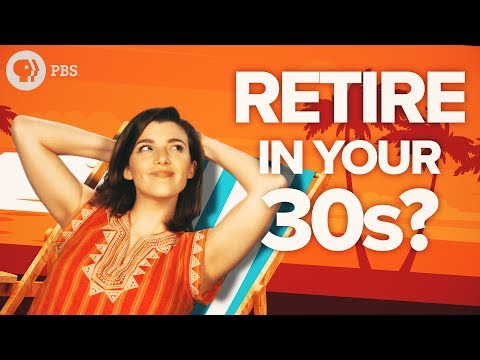

In [6]:
#a 5 minute overview of FIRE
YouTubeVideo('8si7cqw9wm0')

# How to become financially independent

1. Track your spending
2. Lower your spending and payoff debts
3. Invest
4. Retire early and only work when you want on things you are passionate about



<br>

----------
<br>

# Why should you trust me or any other financial advisor for that matter?

## You shouldn't trust me
- Ask lots of questions before giving money to someone else
- Here is my financial story



<br>

----------
<br>

# Track your spending - budgeting

## First steps to acheiving Financial Independence
1. Understand how much you make and how much you spend
2. Understand where you spend your money
    - Everyone has different styles or preferences (more or less granularity)
    - Here are my bins (housing, health, food, transportation, utilities, miscellaneous)

**Tools**
- YNAB & MINT
- Excel
- Quicken
- Bank apps



<br>

----------
<br>

# Lower your spending

## First things first - PAYOFF debts!!
### Debts with high interest are like anti investing
 - Payoff credit cards (rates can be as high as 15-20%)
 - Improves credit rating!
 
## The magic of auto bill pay.
### Set it and forget it - no late fees with high interest



<br>

----------
<br>

## How to spend less without being miserable?
### Why are you buying that?  (Greed or Fear)
### Does that thing really make you happy?
- The concept of badassity.
- The challenge of consumerism



<br>

----------
<br>

## Be nice to your future self
### 1 coffee at \\$4 a day times 365 days in a year = \\$1460
### minus 1 bag of coffee \\$8 each week at home = \\$416
### total savings = \\$1044 per year



## Be really nice to your future self

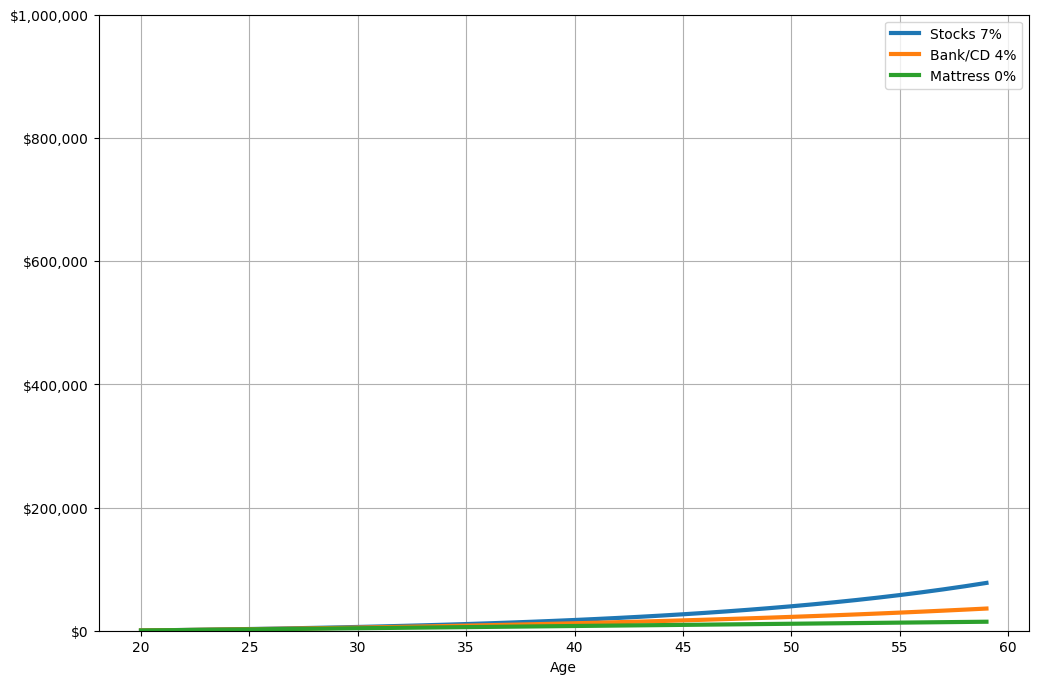

In [9]:
fs_rn_res = widgets.interactive(fs_rn_output, i=fs_rn_investment)
widgets.jslink((fs_rn_play, 'value'), (fs_rn_investment, 'value'))
widgets.VBox([fs_rn_play, fs_rn_res])

<br>

----------
<br>

# Investing
## Warning We are NOT accredited financial advisors
### Before investing
 - Payoff debts
 - Build emergency funds (General rule: Be able to cover 3-6 months of expenses)
 
### Investing versus saving

### Liquid versus non-liquid assets
 - How quickly can I cash out my investment/assets?
 - Are there any penalties/fees for early withdrawl?



<br>

----------
<br>

 ## Investing options
 ### Standard investment options
 - Savings
 - Money Market
 - Certificate of Deposit (CD)
 - Bonds
 - Stocks (Index Funds)
 - Real estate
 
 ### Speculation (risky investments)
  - Lottery
  - CryptoCurrency
  - Individual stocks
    - Meme stocks (Gamestop)
    - Stock options
  
 ### How & where to invest (keep it simple)
 * Company investments
     * **401K**
     * **Employee Stock Purchase Plans**
 * Online broker (Vanguard, Schwab, Robinhood, etc.)
     * **target age retirement fund**
     * **index funds**
     * ETFs (groups of stocks)
     * traditional & roth IRAs (tax benefits)
     * actively managed funds (beware)
     * Robo advisers (automated allocation and diversification offered by many online brokers)
 * Certified Financial Planner (CFP)
 
### Free money (Yes you heard that right)
 * Company benefits
     * 401k matching
     * Employee Stock Purchase Plan discounts
     * HSA and other tax free options
* For advanced users only
    * Gaming the system with reward credit cards
 


<br>

----------
<br>

 ## Investing strategies
 - Diversify
 - Low or no fee index funds
 - Be wary of investment advisers
 - "Past performance does not guarantee future results"
 
### Invest early and often (more compound interest magic)

### Set it and forget it



<br>

----------
<br>

 ## Retire early
 
 ### 4% and 25 times rules

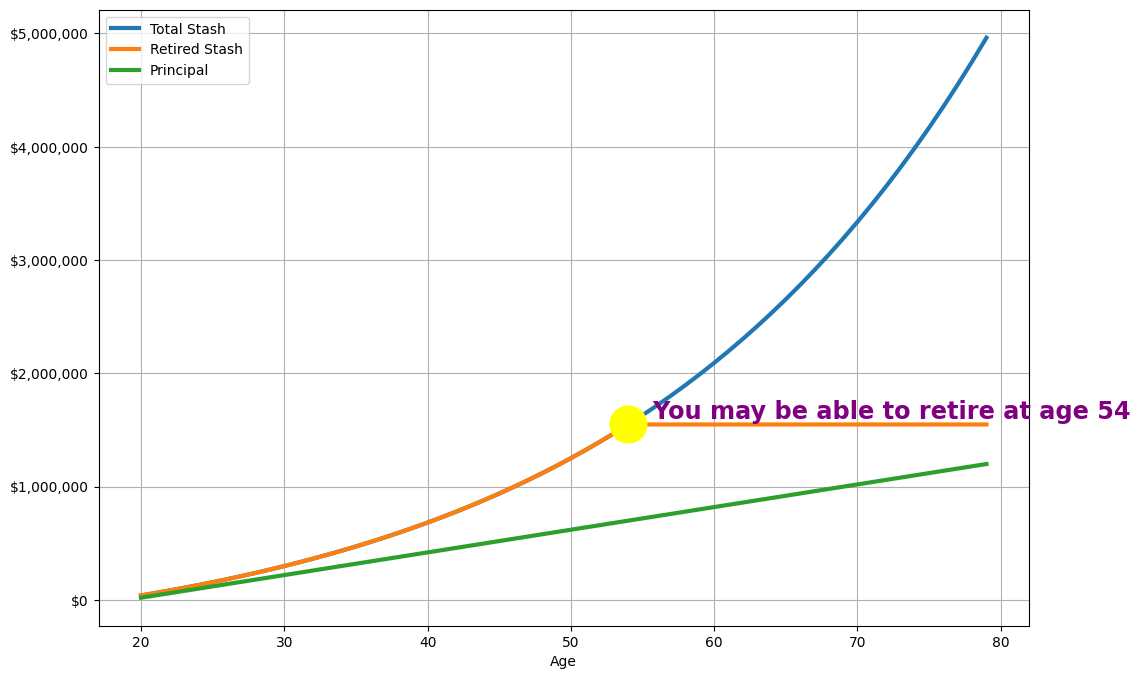

In [8]:
r_res = widgets.interactive(r_output, r=rate, a=age, sal=salary, sp=spending, w=net_worth)
widgets.VBox([r_res])

<br>

----------
<br>

# Takeaway
 - Track your spending - budgeting
 - Payoff debts
 - Lower your spending
 - Build emergency fund
 - Invest for the future
    - Be nice to your future self
    - How soon can you retire?
    - The 4% rule
    - Invest early and often (more compound interest magic)
  


<br>

----------
<br>

## Links
- FIRE Intro on Youtube - https://www.youtube.com/watch?v=8si7cqw9wm0
- FIRE retirement calculator - https://playingwithfire.co/retirementcalculator/
- Mr. Money Mustache & the 4% Rule - https://www.mrmoneymustache.com/2012/05/29/how-much-do-i-need-for-retirement/
- compound interest - https://www.fool.com/how-to-invest/thirteen-steps/step-1-change-your-life-with-one-calculation.aspx